# Embed a trivial 3 dimensional dataset to 2 dimensions

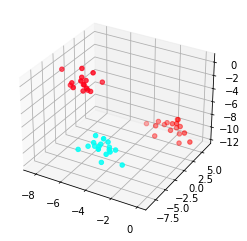

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=3, n_features=3, random_state=1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='hsv')

plt.show()

Epoch 1/5
Total loss: 4837.67529296875
Epoch 2/5
Total loss: 691.1658325195312
Epoch 3/5
Total loss: 511.20867919921875
Epoch 4/5
Total loss: 477.745849609375
Epoch 5/5
Total loss: 456.0909423828125


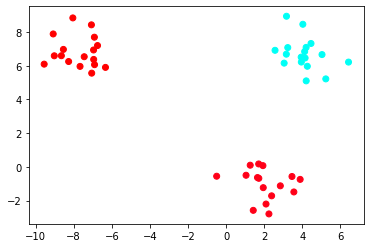

In [4]:
from saepipe import EmbeddingPipeline
from numpy.linalg import norm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X_d = {i: row for i, row in zip(range(len(X)), X)}

model = Sequential()
model.add(Dense(10))
model.add(Dense(2))

pipeline = EmbeddingPipeline(model, 2, epochs=5).train(X_d, lambda a, b: norm(a - b))

X_pred = pipeline.predict(X)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_pred[:, 0], X_pred[:, 1], c=y, cmap='hsv')

plt.show()
